In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
plt.rcParams["figure.figsize"] = [16,12]
plt.rcParams.update({"font.size" : 18})

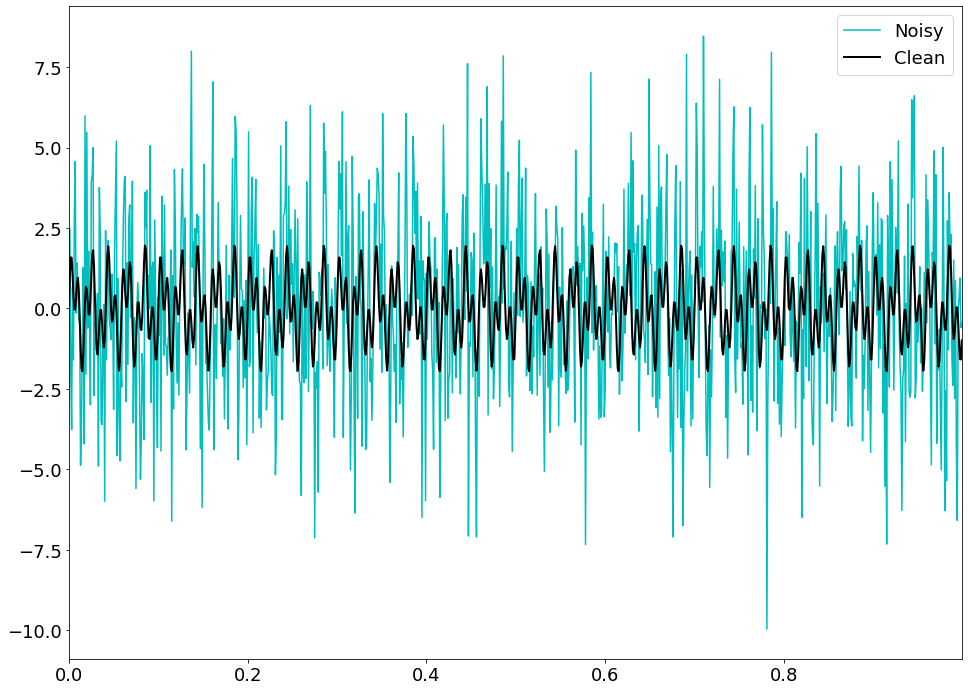

In [5]:
#create sample signal with two frequencies
dt = 0.001
t = np.arange(0,1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi * 120 * t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t,f , color = "c" , LineWidth = 1.5 , label = "Noisy")
plt.plot(t , f_clean , color = "k" , LineWidth = 2 , label = "Clean")
plt.xlim(t[0], t[-1])
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


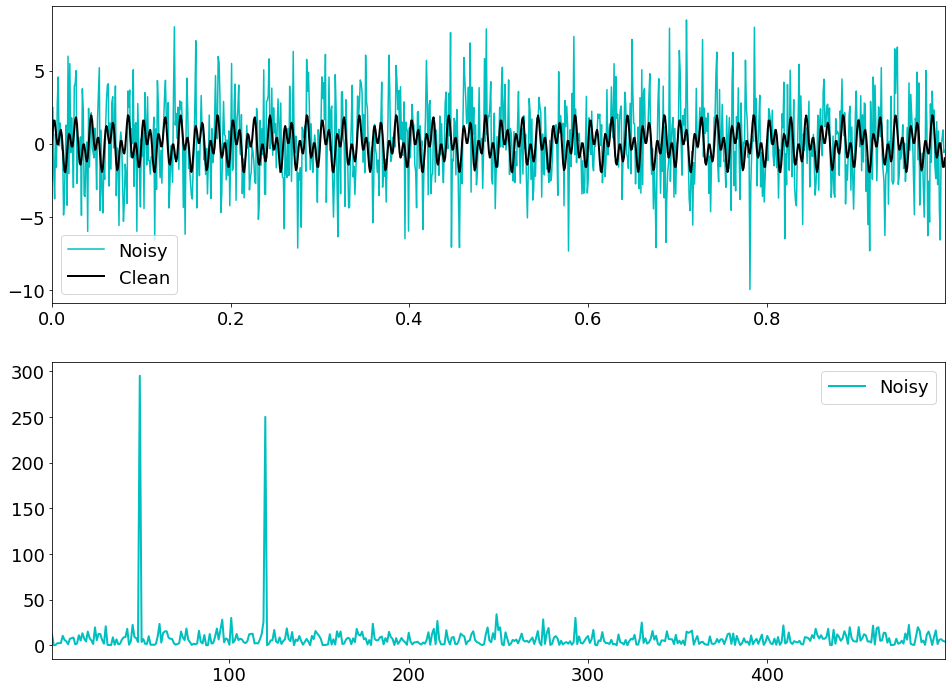

In [7]:
#compute Fast Fourier Transform

n = len(t)
fhat = np.fft.fft(f , n)  # compute fft
PSD = fhat * np.conj(fhat) / n  #Power Spectrum per frequency 
freq = (1/(dt * n)) * np.arange(n)
L = np.arange(1 , np.floor(n/2) , dtype = "int") #only plot first half

fig , axis = plt.subplots(2,1)
plt.sca(axis[0])
plt.plot(t,f , color = "c" , LineWidth = 1.5 , label = "Noisy")
plt.plot(t , f_clean , color = "k" , LineWidth = 2 , label = "Clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(freq[L], PSD[L] , color = "c" , LineWidth = 2, label = "Noisy")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()


In [8]:
#use PSD to filter out Noise 
indices = PSD > 100 #all freq with power > 100
PSDclean = PSD * indices  # zero all other 
fhat = indices * fhat  #zero  out small fourier coefficients
ffilt = np.fft.ifft(fhat )  #recovering signal by inverse FFT




/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


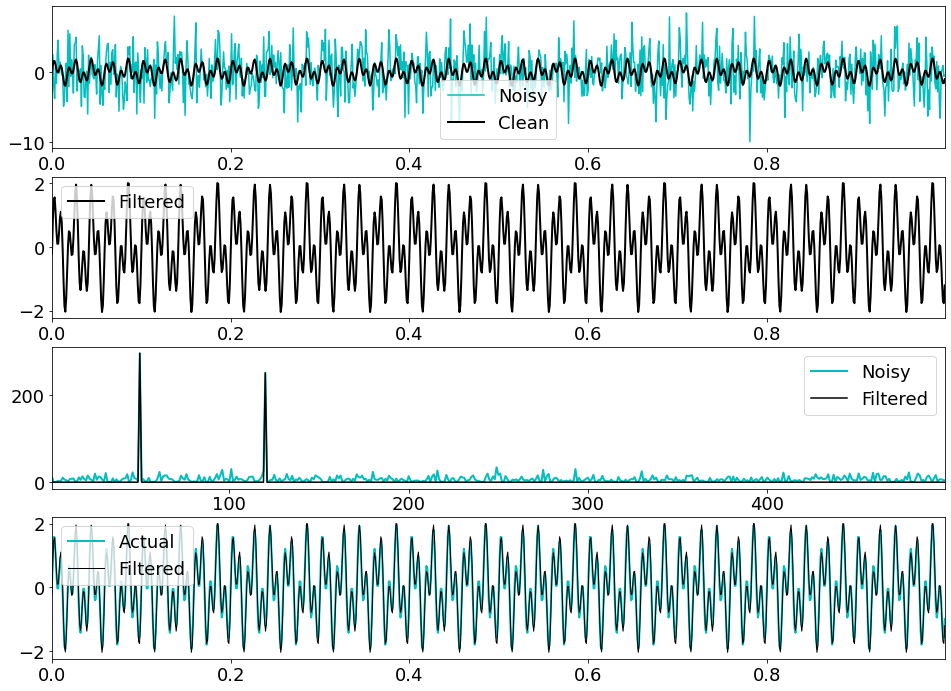

In [13]:
fig , axes = plt.subplots(4,1)

plt.sca(axes[0])
plt.plot(t,f , color = "c" , LineWidth = 1.5 , label = "Noisy")
plt.plot(t , f_clean , color = "k" , LineWidth = 2 , label = "Clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axes[1])
plt.plot(t , ffilt , color = "k" , LineWidth = 2 , label = "Filtered")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axes[2])
plt.plot(freq[L], PSD[L] , color = "c" , LineWidth = 2, label = "Noisy")
plt.plot(freq[L], PSDclean[L] , color = "k", LineWidth = 1.5 , label = "Filtered")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.sca(axes[3])
plt.plot(t , f_clean , color = "c" , LineWidth = 2 , label = "Actual")
plt.plot(t , ffilt , color = "k" , LineWidth = 1 , label = "Filtered")
plt.xlim(t[0], t[-1])
plt.legend()

plt.show()

